In [129]:
import networkx as nx
import pandas as pd

# Load the .graphml file
file_path = "G_3.graphml"  # Update with the correct path if needed
G = nx.read_graphml(file_path)
len(G.edges)



3247

### Get sex degree of gays



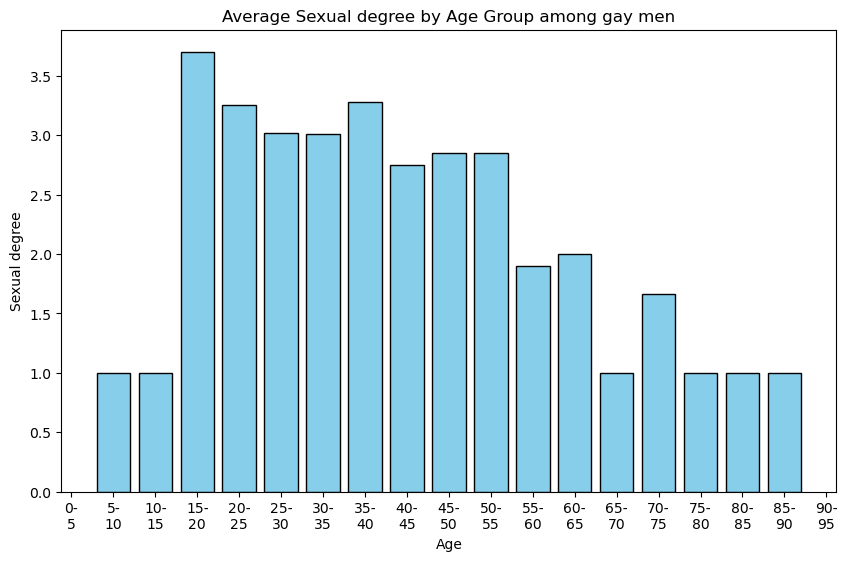

In [71]:
k = []
for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    gay = node_attributes.get("Gay", None)  # Safely get the "Race" attribute
    if gay== 1:
        age=node_attributes.get("Age", None)
        if age !=" ":
            degree=G.degree(node_id)
            k.append([age,degree])  # Append the "Race" value to the list

# Convert to DataFrame
import matplotlib.pyplot as plt
# Convert to DataFrame
df = pd.DataFrame(k, columns=['Age', 'Value'])

# Ensure 'Age' is treated as numeric (even if initially it's a string)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check if the 'Value' column is numeric and coerce if necessary
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Now group by 'Age' and calculate the average of 'Value'
# Define the age intervals
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['0-\n5', '5-\n10', '10-\n15', '15-\n20', '20-\n25', '25-\n30', '30-\n35', '35-\n40', '40-\n45', '45-\n50', 
          '50-\n55', '55-\n60', '60-\n65', '65-\n70', '70-\n75', '75-\n80', '80-\n85', '85-\n90', '90-\n95', '95-\n100']

# Create a new column with the corresponding age group
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the average 'Value' for each age group
avg_per_age_group = df.groupby('Age_Group')['Value'].mean()


plt.figure(figsize=(10, 6))
plt.bar(avg_per_age_group.index, avg_per_age_group.values, color='skyblue', edgecolor='black')
# Add title and labels
plt.title('Average Sexual degree by Age Group among gay men')
plt.xlabel('Age')
plt.ylabel('Sexual degree')

# Show the plot
plt.show()

### pie charts of HIV according to certain groups

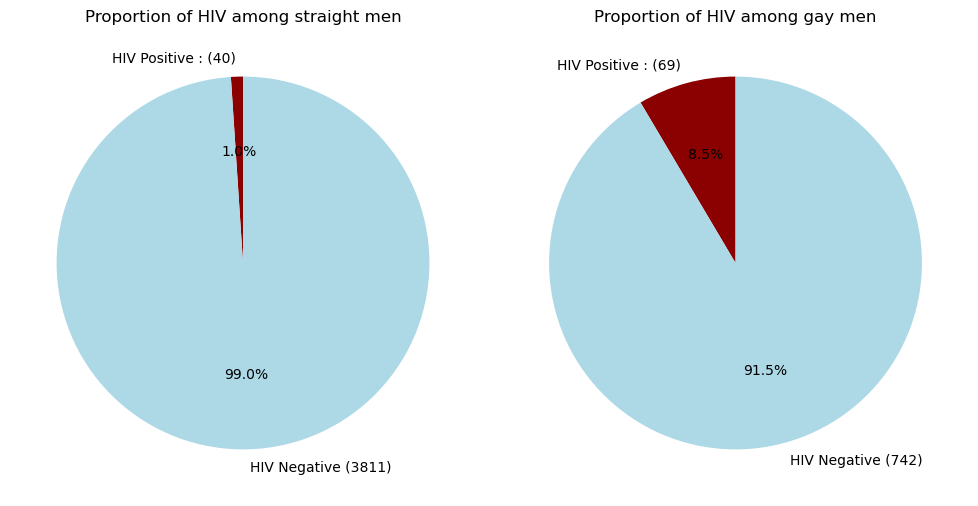

In [70]:
straight= []
straighthiv=[]
gay=[]
gayhiv=[]
for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    if node_attributes.get("Sex", None)=="Male":
        Gay_bool = node_attributes.get("Gay", None)  # Safely get the "Race" attribute
        HIV=node_attributes.get("HIV_status", None)
        if Gay_bool== 1:
            gay.append(node_id)
            if HIV== 'Positive':
                gayhiv.append(node_id)
        if Gay_bool== 0:
            straight.append(node_id)
            if HIV== 'Positive':
                straighthiv.append(node_id)

# Data for Pie Chart 1
labels1 =   ['HIV Positive : ('+ str(len(straighthiv)) + ")", 'HIV Negative ('+ str(len(straight)-len(straighthiv)) + ")"]
sizes1 = [len(straighthiv)/len(straight),1-len(straighthiv)/len(straight)]

# Data for Pie Chart 2
labels2 =  ['HIV Positive : ('+ str(len(gayhiv)) + ")", 'HIV Negative ('+ str(len(gay)-len(gayhiv)) + ")"]
sizes2 = [len(gayhiv)/len(gay),1-len(gayhiv)/len(gay)]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot Pie Chart 1
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90,colors=['darkred', 'lightblue'])
ax1.set_title('Proportion of HIV among straight men')

# Plot Pie Chart 2
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90,colors=['darkred', 'lightblue'])
ax2.set_title('Proportion of HIV among gay men')

# Display the plots
plt.tight_layout()
plt.show()



### Bar chart for Hiv among genders

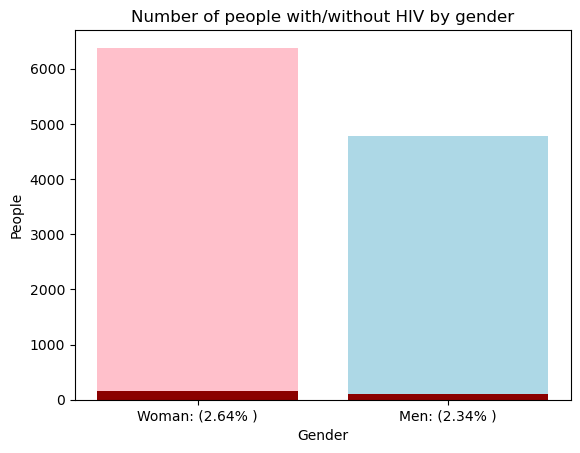

In [93]:
W_count=0
M_count=0
WHIV_count=0
MHIV_count=0


for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    if node_attributes.get("Sex", None)=="Male":
        M_count+=1
        HIV=node_attributes.get("HIV_status", None)
        if HIV=="Positive":
            MHIV_count+=1
    if node_attributes.get("Sex", None)=="Female":
        W_count+=1
        HIV=node_attributes.get("HIV_status", None)
        if HIV=="Positive":
            WHIV_count+=1
        

# Data for the bars
categories = ['Woman: (' + str(round(100*(WHIV_count/W_count),2))+"% )", 'Men: (' + str(round(100*(MHIV_count/M_count),2))+"% )"]
values_1 = [WHIV_count, MHIV_count]  # First part of the stacked bars
values_2 = [W_count, M_count]  # Second part of the stacked bars

# Create a stacked bar chart
plt.bar(categories, values_1, label='Bar 1',color=['darkred', 'darkred'])
plt.bar(categories, values_2, bottom=values_1, label='Bar 2',color=['pink', 'lightblue'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('People')
plt.title('Number of people with/without HIV by gender')

# Add a legend
#plt.legend()

# Show the chart
plt.show()


In [72]:
for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    print(node_attributes)
    break

{'HIV_status': 'Positive', 'Race': 'Black', 'Sex': 'Male', 'Age': '45', 'Education level': 'ID', 'Profession': 'missing (out of design)', 'Gay': 1}


### Degree for sex on age with gay and straights

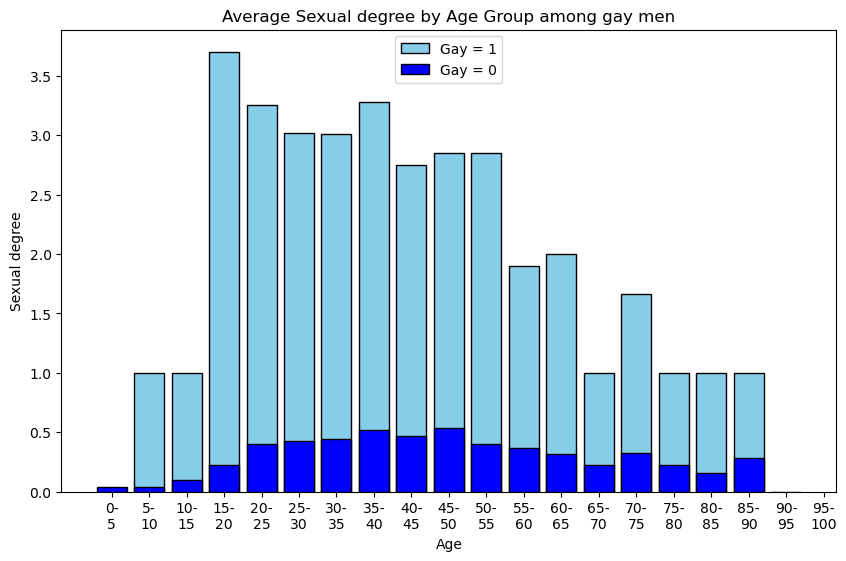

In [124]:

k = []
for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    gay = node_attributes.get("Gay", None)  # Safely get the "Race" attribute
    if gay== 1:
        age=node_attributes.get("Age", None)
        if age !=" ":
            degree=G.degree(node_id)
            k.append([age,degree])  # Append the "Race" value to the list

ks=[]
for node_id in G.nodes:  # Iterate over node IDs directly
    node_attributes = G.nodes[node_id]  # Access attributes for the current node
    gay = node_attributes.get("Gay", None)  # Safely get the "Race" attribute
    if gay== 0:
        age=node_attributes.get("Age", None)
        degree=G.degree(node_id)
        if age !=" " and degree!=-1:
            ks.append([age,degree])  # Append the "Race" value to the list



# Convert to DataFrame
import matplotlib.pyplot as plt
# Convert to DataFrame
df = pd.DataFrame(k, columns=['Age', 'Value'])
dfs = pd.DataFrame(ks, columns=['Age', 'Value'])


# Ensure 'Age' is treated as numeric (even if initially it's a string)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
dfs['Age'] = pd.to_numeric(dfs['Age'], errors='coerce')
# Check if the 'Value' column is numeric and coerce if necessary
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
dfs['Value'] = pd.to_numeric(dfs['Value'], errors='coerce')

# Now group by 'Age' and calculate the average of 'Value'
# Define the age intervals
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['0-\n5', '5-\n10', '10-\n15', '15-\n20', '20-\n25', '25-\n30', '30-\n35', '35-\n40', '40-\n45', '45-\n50', 
          '50-\n55', '55-\n60', '60-\n65', '65-\n70', '70-\n75', '75-\n80', '80-\n85', '85-\n90', '90-\n95', '95-\n100']

# Create a new column with the corresponding age group
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
dfs['Age_Group'] = pd.cut(dfs['Age'], bins=bins, labels=labels, right=False)

# Calculate the average 'Value' for each age group
avg_per_age_group = df.groupby('Age_Group')['Value'].mean()
avg_per_age_groups = dfs.groupby('Age_Group')['Value'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_per_age_group.index, avg_per_age_group.values, color='skyblue', edgecolor='black', label='Gay = 1')
plt.bar(avg_per_age_groups.index, avg_per_age_groups.values, color='blue', edgecolor='black', label='Gay = 0')
# Add title and labels
plt.title('Average Sexual degree by Age Group among gay men')
plt.xlabel('Age')
plt.legend()
plt.ylabel('Sexual degree')


# Show the plot
plt.show()

In [128]:
len(G.edges)

3247